# AND and NAND Gate

## Import and Formatting

The goal of this section is to import all the necessary files and libraries required for the subsequent data analysis.  
It also includes setting up the formatting parameters for the plots and visualizations.

### Import

In [1]:
# ----  Standard import
import matplotlib.pyplot as plt
import numpy as np
import itertools

# ----- Spice import
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

### Formatting

Adjusting Plotly chart settings for clarity and consistency.

In [2]:
# ----  Formatting charts
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['axes.edgecolor']  = "#bcbcbc"
mpl.rcParams['patch.linewidth'] = 0.5
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['axes.facecolor']  = "#eeeeee"
mpl.rcParams['axes.labelsize']  = "large"
mpl.rcParams['axes.grid']       = True
mpl.rcParams['grid.linestyle']  = "--"
mpl.rcParams['patch.edgecolor'] = "#eeeeee"
mpl.rcParams['axes.titlesize']  = "x-large"

## Objective

The objective of this section is to understand the operation of the *AND* logic gate as well as its inverse, the *NAND* gate.

This study will first rely on the analysis of the **truth table** of these logic gates. We will then examine how these gates can be **implemented electronically**, particularly using transistors, in order to establish a clear connection between Boolean logic and its hardware realization.

## Electrical Symbol

In this book, the only standard used is the **European standard**.

The symbol is shown in [](#symbol_and). It is very simple: a rectangle containing an ampersand symbol (&). The gate has two logical inputs (A and B) and one output (Y).

```{figure} ./images/symbol_and.svg
:name: symbol_and
:align: center
:width: 400px

Symbol for an AND logic gate
```

## Truth Table

The truth table is given below:

```{table} Truth table of a AND gate
:name: Table_de_verite_d_une_porte_AND
:align: center

| A | B | Y |
| - | - | - |
| 0 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |
```

The truth table of an AND gate is very simple ([](#Table_de_verite_d_une_porte_AND)). Both inputs *A* and *B* must be equal to `1` for the output to be `1`. Otherwise, the output value is `0`.

Conversely, for a `NAND` gate ([](#Table_de_verite_d_une_porte_NAND)), both inputs *A* and *B* must be equal to `1` for the output to be `0`. Otherwise, the output value is `1`.

```{table} Truth table of a NAND gate
:name: Table_de_verite_d_une_porte_NAND
:align: center

| A | B | Y |
| - | - | - |
| 0 | 0 | 1 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |
```

## Electronic Circuit

In the next section, the objective is to design electronic circuits in order to implement an AND gate and a `NAND` gate. In most cases, it is easier to first build a `NAND` gate and then add an inverter to obtain an AND gate.

### CMOS

#### NAND Gate – Demonstration

In modern digital electronics, CMOS technology is used in most cases. Therefore, the first step is to study these gates using CMOS transistors.

A brief study was presented in the section [*Introduction to Microelectronics*](../Introduction/Introduction_bar_metal_Layout). The objective here is to go further in the analysis.

First, we consider the electronic circuit of a `NAND` gate ([](#circuit_electronique_CMOS_NAND)). It can be seen that implementing a `NAND` gate requires four CMOS transistors.

```{figure} ./images/CMOS_NAND.svg
:name: circuit_electronique_CMOS_NAND
:align: center
:width: 400px

Electronic circuit of a CMOS NAND gate
``` 

The operation of the circuit is relatively simple [](#CMOS_NAND_demonstration). If one of the two inputs is not equal to `1`, the output voltage *Y* is equal to VDD, i.e. `1`. Only when both transistors are turned on does the output voltage drop to `0`.

```{figure} ./images/CMOS_NAND_demonstration.svg
:name: CMOS_NAND_demonstration
:align: center
:width: 600px

NAND gate operation demonstration
```

#### NAND Gate – Simulation

In the next part, the goal is to build the corresponding electronic circuit for simulation. The electrical schematic is shown in [](#CMOS_NAND_spice). This schematic is relatively standard.

```{figure} ./images/CMOS_NAND_spice.svg
:name: CMOS_NAND_spice
:align: center
:width: 400px

SPICE schematic of a CMOS NAND gate using four transistors
```

In [3]:
# ============================================================
# CMOS NAND Gate 
# Technology: PTM 65 nm
# ============================================================

# Create the circuit object
circuit = Circuit('CMOS NAND')

# ============================================================
# Model Libraries
# Include NMOS and PMOS transistor models
# ============================================================

circuit.include('lib/ptm_65nm_nmos_bulk.mod')
circuit.include('lib/ptm_65nm_pmos_bulk.mod')

# ============================================================
# Power Supply Definition
# ============================================================

# Supply voltage
VDD = 1.2

# DC power supply (VDD)
circuit.V('dd', 'vdd', circuit.gnd, VDD @ u_V)

# ============================================================
# Input Signal Definitions
# Two pulse voltage sources are used to test all logic states
# ============================================================

# Input A: faster pulse
circuit.PulseVoltageSource(
    'A',
    'va',
    circuit.gnd,
    0 @ u_V, VDD @ u_V,
    pulse_width=5 @ u_ns,
    period=10 @ u_ns
)

# Input B: slower pulse
circuit.PulseVoltageSource(
    'B',
    'vb',
    circuit.gnd,
    0 @ u_V, VDD @ u_V,
    pulse_width=10 @ u_ns,
    period=20 @ u_ns
)

# ============================================================
# CMOS Logic Core
# NAND gate implementation
# ============================================================

# ----------------------------
# PMOS Pull-Up Network (PUN)
# PMOS transistors are connected in parallel
# ----------------------------

circuit.MOSFET(
    1,
    'vout', 'va', 'vdd', 'vdd',
    model='ptm65nm_pmos',
    l=0.35 @ u_um,
    w=0.5 @ u_um
)

circuit.MOSFET(
    2,
    'vout', 'vb', 'vdd', 'vdd',
    model='ptm65nm_pmos',
    l=0.35 @ u_um,
    w=0.5 @ u_um
)

# ----------------------------
# NMOS Pull-Down Network (PDN)
# NMOS transistors are connected in series
# ----------------------------

circuit.MOSFET(
    3,
    'vout', 'va', 'inter', circuit.gnd,
    model='ptm65nm_nmos',
    l=0.35 @ u_um,
    w=0.1 @ u_um
)

circuit.MOSFET(
    4,
    'inter', 'vb', circuit.gnd, circuit.gnd,
    model='ptm65nm_nmos',
    l=0.35 @ u_um,
    w=0.1 @ u_um
);

In [4]:
# ============================================================
# Simulation Setup
# Transient analysis of the CMOS logic gate
# ============================================================

# Create the simulator instance
# Temperature parameters are set to nominal operating conditions
simulator = circuit.simulator(
    temperature=25,
    nominal_temperature=25
)

# ============================================================
# Transient Analysis
# ============================================================

# Perform a transient simulation to observe the dynamic behavior
# of the inputs (A, B) and the output (Vout)
analysis = simulator.transient(
    step_time=0.1 @ u_ns,
    end_time=20 @ u_ns
)

#### Chronogram NAND Gate

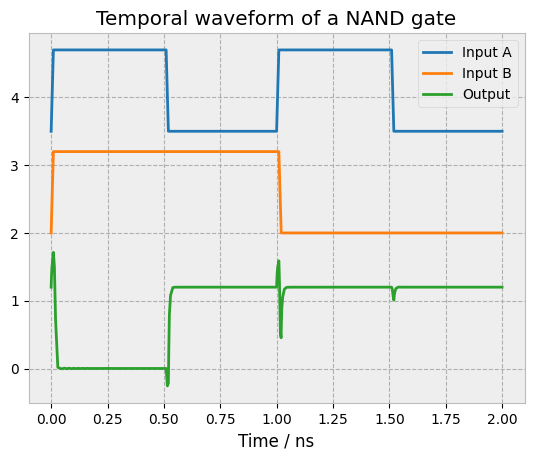

In [5]:
# Plot the transient waveforms
plt.figure()
plt.title("Temporal waveform of a NAND gate")

# Input signals (shifted vertically for clarity)
plt.plot(analysis.time * 1e8, np.array(analysis["va"]) + 3.5, label="Input A")
plt.plot(analysis.time * 1e8, np.array(analysis["vb"]) + 2.0, label="Input B")

# Output signal
plt.plot(analysis.time * 1e8, analysis["vout"], label="Output")

# Axis labels and legend
plt.xlabel("Time / ns")
plt.legend()
plt.show()

It is possible to observe several things in this timing diagram. First, the truth table of a NAND gate can be clearly identified: both inputs *A* and *B* must be at `1` for the output to be `0`. In all other cases, the output remains at `1`.

Another important point is that during transitions of inputs *A* and *B*, fluctuations can be observed at the output. These effects are due to switching phenomena in the transistors. In the next part of the report, the objective will be to correct or mitigate these fluctuations.

Before addressing this issue, the next goal is to obtain a clearer representation of the truth table. For now, there are only two inputs, but in cases with more inputs, it becomes much more difficult to visualize all possible responses using a simple timing diagram.

#### NAND Gate Logic Visualization

In [6]:
def logic(level):
    return VDD@ u_V if level else 0 @ u_V

In [7]:
# Store simulation results
results = []

# Iterate over all input combinations (truth table)
for A, B in itertools.product([0, 1], repeat=2):

    # Create a new circuit for each input combination
    circuit = Circuit(f'CMOS AND A={A} B={B}')

    # Include transistor models
    circuit.include('lib/ptm_65nm_nmos_bulk.mod')
    circuit.include('lib/ptm_65nm_pmos_bulk.mod')
    
    # Power supply
    circuit.V('dd', 'vdd', circuit.gnd, VDD)

    # Logic inputs (DC values)
    circuit.V('A', 'va', circuit.gnd, logic(A))
    circuit.V('B', 'vb', circuit.gnd, logic(B))

    # ========================================================
    # CMOS NAND gate
    # ========================================================

    # PMOS pull-up network (parallel)
    circuit.MOSFET(
        1,
        'vout', 'va', 'vdd', 'vdd',
        model='ptm65nm_pmos',
        l=0.35 @ u_um,
        w=0.5 @ u_um
    )
    
    circuit.MOSFET(
        2,
        'vout', 'vb', 'vdd', 'vdd',
        model='ptm65nm_pmos',
        l=0.35 @ u_um,
        w=0.5 @ u_um
    )
    
    # NMOS pull-down network (series)
    circuit.MOSFET(
        3,
        'vout', 'va', 'inter', circuit.gnd,
        model='ptm65nm_nmos',
        l=0.35 @ u_um,
        w=0.1 @ u_um
    )
    
    circuit.MOSFET(
        4,
        'inter', 'vb', circuit.gnd, circuit.gnd,
        model='ptm65nm_nmos',
        l=0.35 @ u_um,
        w=0.1 @ u_um
    )

    # ========================================================
    # DC operating point analysis
    # ========================================================

    simulator = circuit.simulator()
    analysis = simulator.operating_point()

    # Store output voltage
    Vout = float(analysis['vout'][0])
    results.append((A, B, Vout))

In [8]:
# ============================================================
# Truth Table Verification
# ============================================================

print("Truth Table Verification")
print("------------------------")
print(" A  B   Vout (V)   Y")

# Logic threshold: midpoint of VDD
Vth = float(VDD) / 2

for A, B, Vout in results:
    # Convert analog output voltage to logical value
    Y = 1 if Vout > Vth else 0
    print(f" {A}  {B}   {Vout:.3f}     {Y}")


Truth Table Verification
------------------------
 A  B   Vout (V)   Y
 0  0   1.200     1
 0  1   1.200     1
 1  0   1.200     1
 1  1   0.001     0


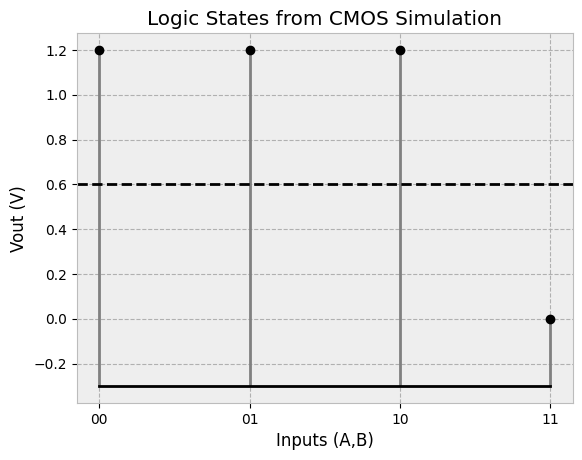

In [9]:
# ============================================================
# Plot CMOS simulation output for all input combinations
# ============================================================

# Labels for each input combination (A,B)
labels = [f"{A}{B}" for A, B, _ in results]

# Corresponding output voltages
Vouts = [Vout for _, _, Vout in results]

# Stem plot for visualizing discrete logic states
plt.stem(
    labels,
    Vouts,
    markerfmt="black",
    linefmt="grey",
    basefmt='black',
    bottom=-0.3  # shift baseline for clarity
)

# Logic threshold line
plt.axhline(Vth, linestyle='--', color="black", label="Logic Threshold")

# Axis labels and title
plt.ylabel("Vout (V)")
plt.xlabel("Inputs (A,B)")
plt.title("Logic States from CMOS Simulation")
plt.show()


The truth table of a `NAND` gate can be clearly observed from the simulation results.

This type of visualization makes it much easier to see all possible outcomes of a logic function.

#### AND Gate Simulation

To implement an `AND` gate, it is sufficient to add an inverter at the output of the `NAND` gate. The corresponding electronic circuit is shown below:

```{figure} ./images/CMOS_AND_spice.svg
:name: CMOS_AND_spice
:align: center
:width: 400px

SPICE schematic of a CMOS AND gate using four transistors
```

In [10]:
# ============================================================
# CMOS AND Gate
# Implemented as NAND gate followed by an inverter
# ============================================================

# Create the circuit
circuit = Circuit('CMOS AND')

# Include transistor models
circuit.include('lib/ptm_65nm_nmos_bulk.mod')
circuit.include('lib/ptm_65nm_pmos_bulk.mod')

# ============================================================
# Power Supply
# ============================================================

VDD = 1.2
circuit.V('dd', 'vdd', circuit.gnd, VDD @ u_V)

# ============================================================
# Input Signal Definitions
# ============================================================

circuit.PulseVoltageSource(
    'A',
    'va',
    circuit.gnd,
    0 @ u_V, VDD @ u_V,
    pulse_width=5 @ u_ns,
    period=10 @ u_ns
)

circuit.PulseVoltageSource(
    'B',
    'vb',
    circuit.gnd,
    0 @ u_V, VDD @ u_V,
    pulse_width=10 @ u_ns,
    period=20 @ u_ns
)

# ============================================================
# CMOS NAND Gate
# ============================================================

# PMOS pull-up network (parallel)
circuit.MOSFET(
    1,
    'vnand', 'va', 'vdd', 'vdd',
    model='ptm65nm_pmos',
    l=0.35 @ u_um,
    w=0.5 @ u_um
)

circuit.MOSFET(
    2,
    'vnand', 'vb', 'vdd', 'vdd',
    model='ptm65nm_pmos',
    l=0.35 @ u_um,
    w=0.5 @ u_um
)

# NMOS pull-down network (series)
circuit.MOSFET(
    3,
    'vnand', 'va', 'inter', circuit.gnd,
    model='ptm65nm_nmos',
    l=0.35 @ u_um,
    w=0.1 @ u_um
)

circuit.MOSFET(
    4,
    'inter', 'vb', circuit.gnd, circuit.gnd,
    model='ptm65nm_nmos',
    l=0.35 @ u_um,
    w=0.1 @ u_um
)

# ============================================================
# CMOS Inverter
# Converts NAND output into AND output
# ============================================================

circuit.MOSFET(
    5,
    'vout', 'vnand', 'vdd', 'vdd',
    model='ptm65nm_pmos',
    l=0.35 @ u_um,
    w=0.5 @ u_um
)

circuit.MOSFET(
    6,
    'vout', 'vnand', circuit.gnd, circuit.gnd,
    model='ptm65nm_nmos',
    l=0.35 @ u_um,
    w=0.5 @ u_um
);

In [11]:
# ============================================================
# Simulation Setup
# Transient analysis of the CMOS logic gate
# ============================================================

# Create the simulator instance
# Temperature parameters are set to nominal operating conditions
simulator = circuit.simulator(
    temperature=25,
    nominal_temperature=25
)

# ============================================================
# Transient Analysis
# ============================================================

# Perform a transient simulation to observe the dynamic behavior
# of the inputs (A, B) and the output (Vout)
analysis = simulator.transient(
    step_time=0.1 @ u_ns,
    end_time=20 @ u_ns
)

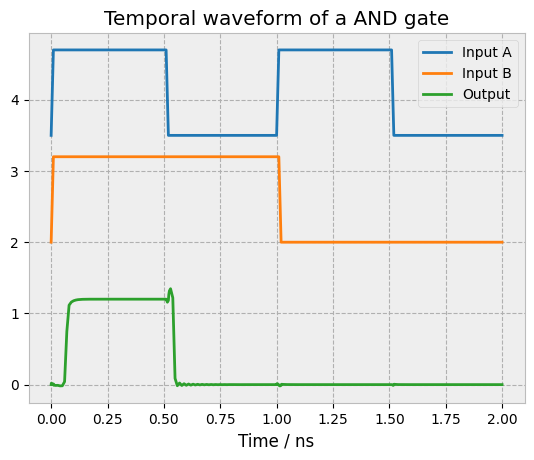

In [12]:
# Plot the transient waveforms
plt.figure()
plt.title("Temporal waveform of a AND gate")

# Input signals (shifted vertically for clarity)
plt.plot(analysis.time * 1e8, np.array(analysis["va"]) + 3.5, label="Input A")
plt.plot(analysis.time * 1e8, np.array(analysis["vb"]) + 2.0, label="Input B")

# Output signal
plt.plot(analysis.time * 1e8, analysis["vout"], label="Output")

# Axis labels and legend
plt.xlabel("Time / ns")
plt.legend()
plt.show()

## Microelectronics

The objective of this section is to **reconstruct and understand the layout (layer view) of a NAND gate**.
The NAND gate is the **simplest CMOS logic gate**, which makes it an ideal starting point for understanding CMOS layout principles.

### Layout Representation

At first glance, the layout shown in [](#CMOS_layer_nand) may look very different from the corresponding CMOS schematic [](#circuit_electronique_CMOS_NAND).

To understand this layout, the first step is to **identify the input and the output**.

* The **input `A` and `B`** are located on the **red vertical line**.
  This line connects the gates of both CMOS transistors: the PMOS and the NMOS.

* The **output `Y`** is located on the **right side of the layout**.
  It corresponds to the **drain connection shared by both transistors**.

### Identification of the Transistors

From the layout, we can clearly identify the two CMOS transistors:

* The **PMOS transistor (pull-up transistor)** is located in the **upper part** of the layout.
* The **NMOS transistor (pull-down transistor)** is located in the **lower part** of the layout.

This vertical arrangement is typical in CMOS design and reflects the logical function of the inverter:

* PMOS connects the output to **VDD** when the input is low
* NMOS connects the output to **GND** when the input is high


### Doping Regions and Substrate

To fully understand the layout, it is also important to identify the doping regions:

* The **green area** represents the **substrate (bulk)**, which is **positively doped**.
* The **orange regions** correspond to **negatively doped areas**, where the source and drain regions of the transistors are formed.

These doping regions define the electrical behavior of the transistors and allow current to flow when the devices are activated.


```{figure} ./images/layer_nand.svg
:name: CMOS_layer_nand
:align: center
:width: 200px

CMOS layout of a NAND gate
```

## Reference 

## Writing Matrix

| Author | Reviewer | Approver | Section | Date 1 | Date 2 | Date 3 | General Remarks |
|--------|----------|----------|---------|--------|--------|--------|------------------|
| Sacha  | /        | /        | Entire document | 2026-01-05 | / | / | Initial draft of the full document |